<a href="https://colab.research.google.com/github/danielasberna/projetos/blob/main/Projeto_Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
df = pd.read_csv("/content/drive/MyDrive/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


In [ ]:
#1)A) Verificando os tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB
None


In [ ]:
#1)B) Preenchendo valores nulos com a mediana pois para essa variável é a melhor opção e modificando de float para int.
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)

df['Income'] = df['Income'].str.replace('.', '').str.replace(',', '.').astype('float64')

In [ ]:
#2)A) Verificando as estatísticas
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


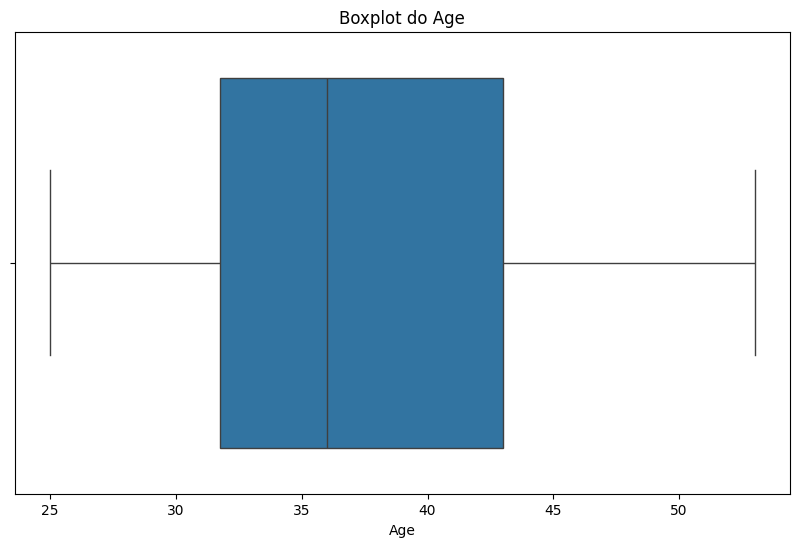

count    164.000000
mean      37.195122
std        7.586619
min       25.000000
25%       31.750000
50%       36.000000
75%       43.000000
max       53.000000
Name: Age, dtype: float64


In [ ]:
#Detectando outliers na coluna Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot do Age')
plt.show()

# Tratamento de outliers - Remoção
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df[(df['Age'] >= limite_inferior) & (df['Age'] <= limite_superior)]
print(df_sem_outliers['Age'].describe())

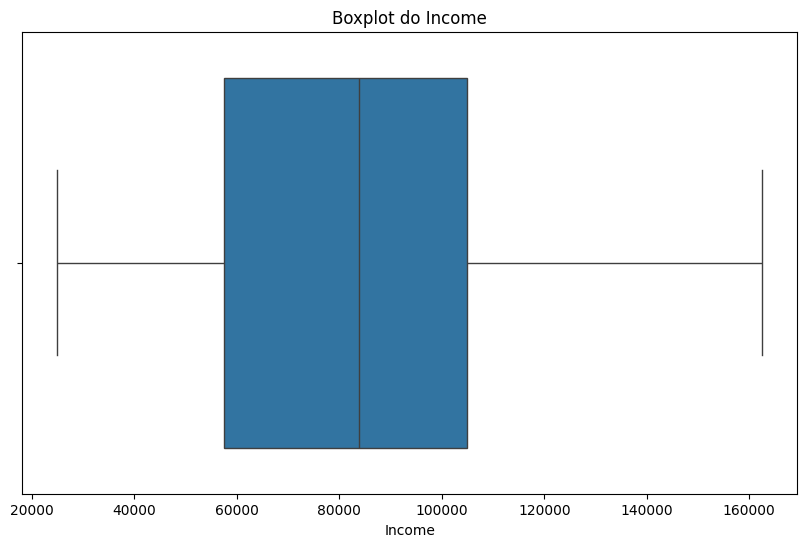

count       164.000000
mean      83765.243902
std       32457.306728
min       25000.000000
25%       57500.000000
50%       83750.000000
75%      105000.000000
max      162500.000000
Name: Income, dtype: float64


In [ ]:
#Detectando outliers na coluna Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot do Income')
plt.show()

# Tratamento de outliers - Remoção
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df[(df['Income'] >= limite_inferior) & (df['Income'] <= limite_superior)]
print(df_sem_outliers['Income'].describe())

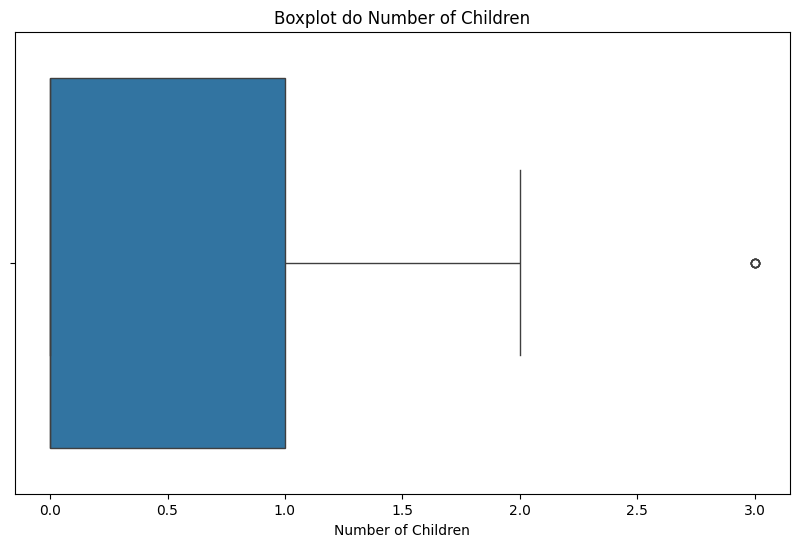

count    159.000000
mean       0.578616
std        0.790639
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Number of Children, dtype: float64


In [ ]:
#Detectando outliers na coluna Number of Children
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Number of Children'])
plt.title('Boxplot do Number of Children')
plt.show()

# Tratamento de outliers - Remoção
Q1 = df['Number of Children'].quantile(0.25)
Q3 = df['Number of Children'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df[(df['Number of Children'] >= limite_inferior) & (df['Number of Children'] <= limite_superior)]
print(df_sem_outliers['Number of Children'].describe())

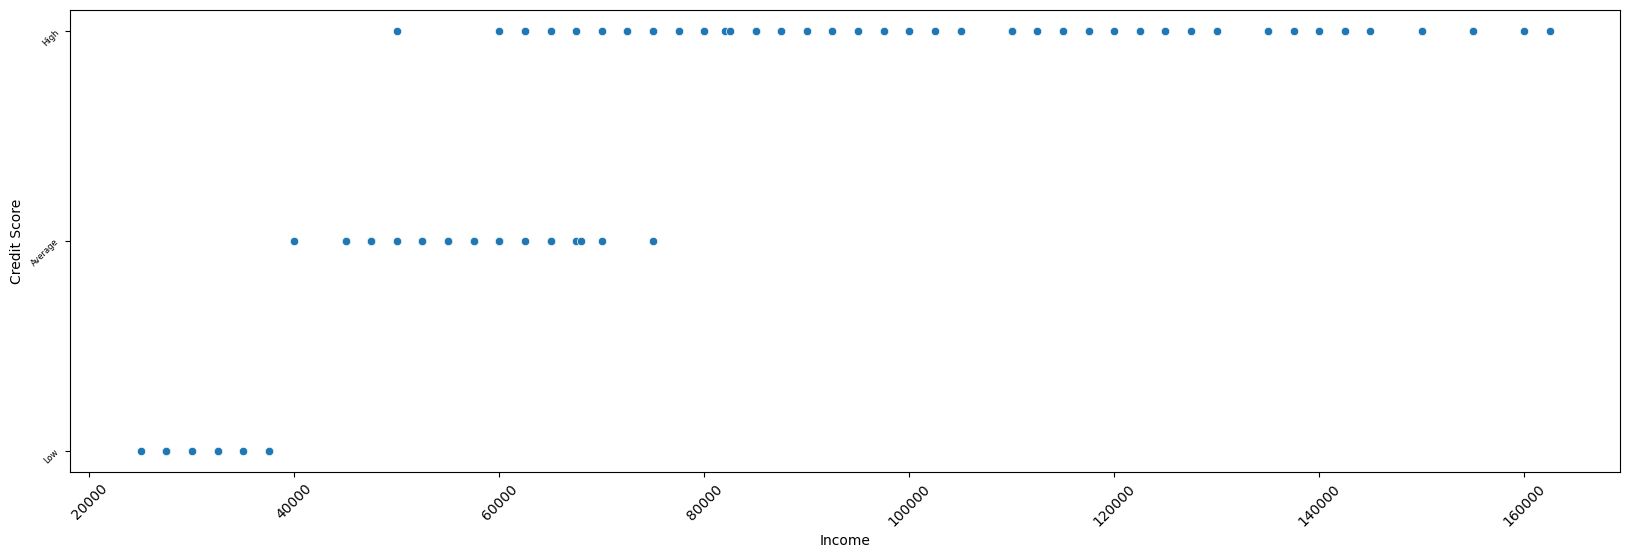

In [ ]:
#Análise bivariada
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Income', y='Credit Score', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = Quanto maior o salário, maior o Score de crédito

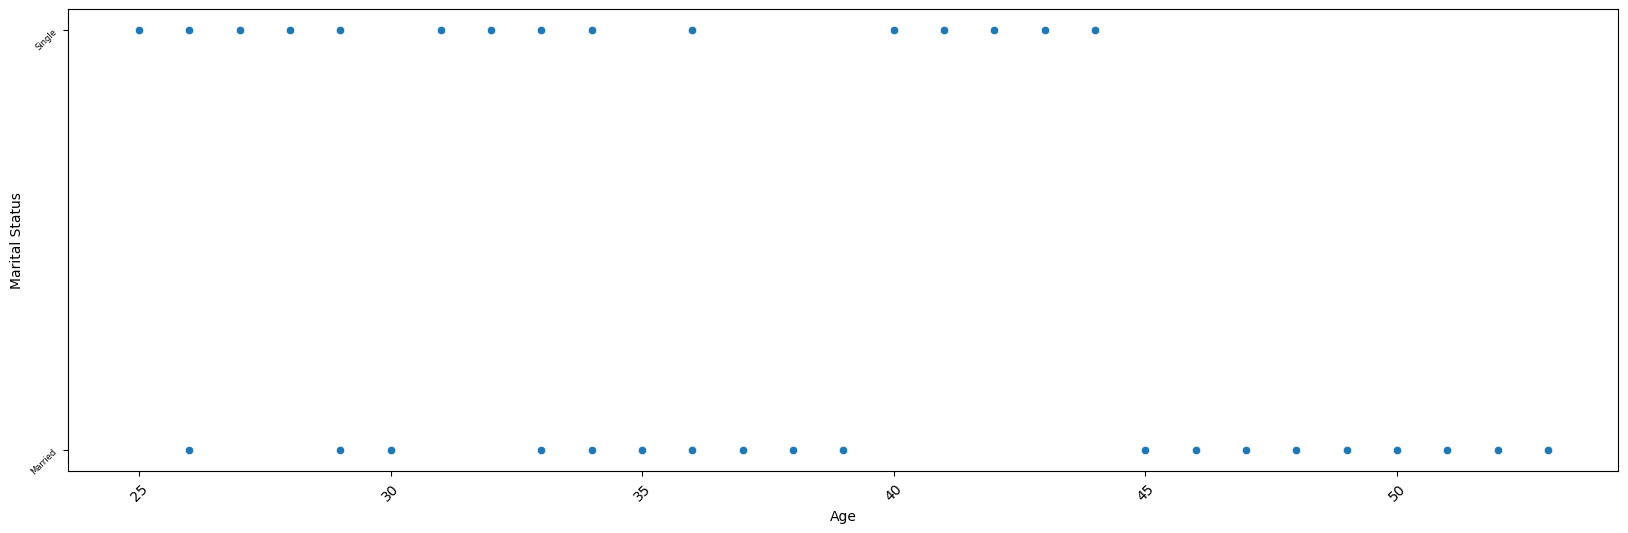

In [ ]:
#Análise bivariada - O status civil parece influenciar na idade?
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Age', y='Marital Status', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = não parece influenciar

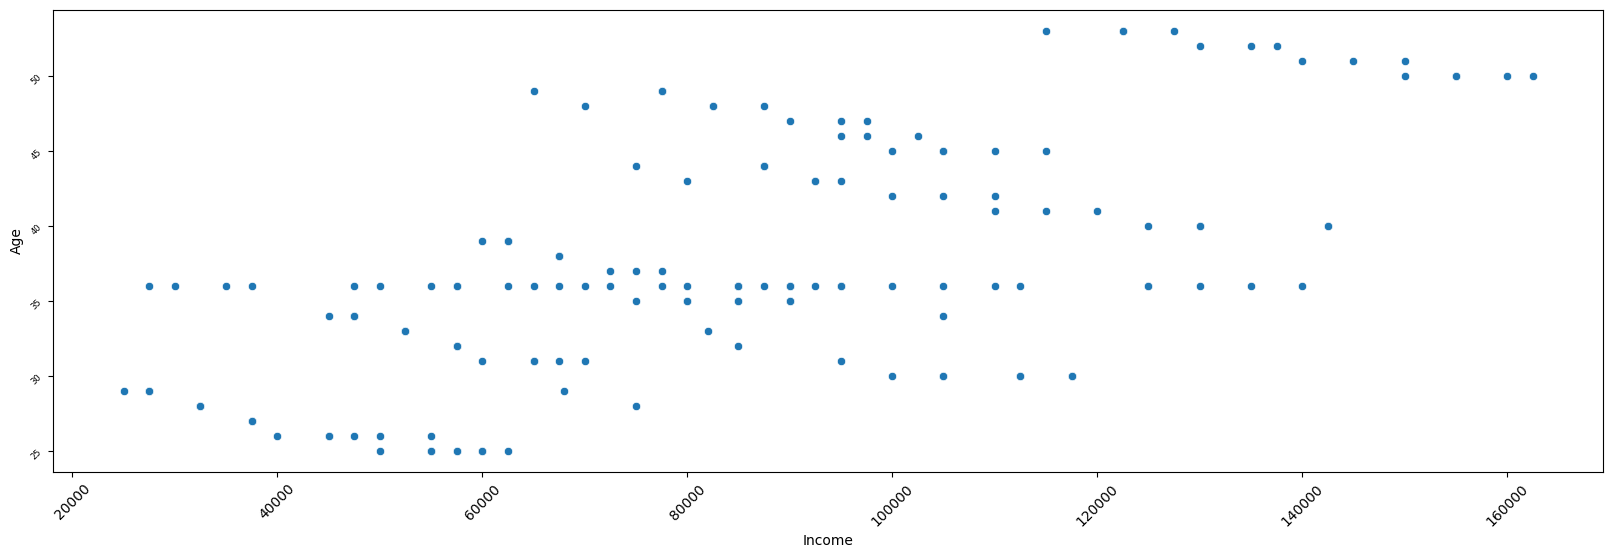

In [ ]:
#Análise bivariada - O salário parece influenciar na idade?
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Income', y='Age', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = Quanto maior a idade, maior o salário

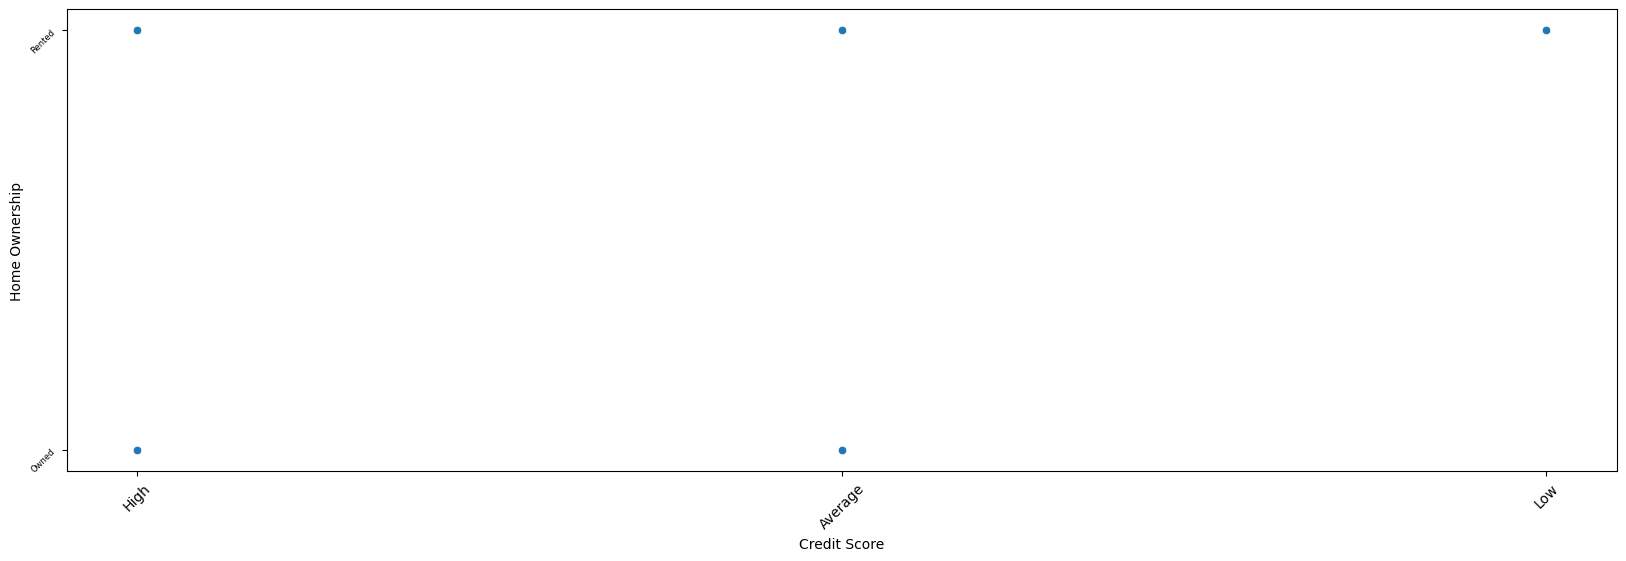

In [ ]:
#Análise bivariada - Clientes com casa própria tendem a ter um score mais alto?
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Credit Score', y='Home Ownership', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = No geral, não influencia

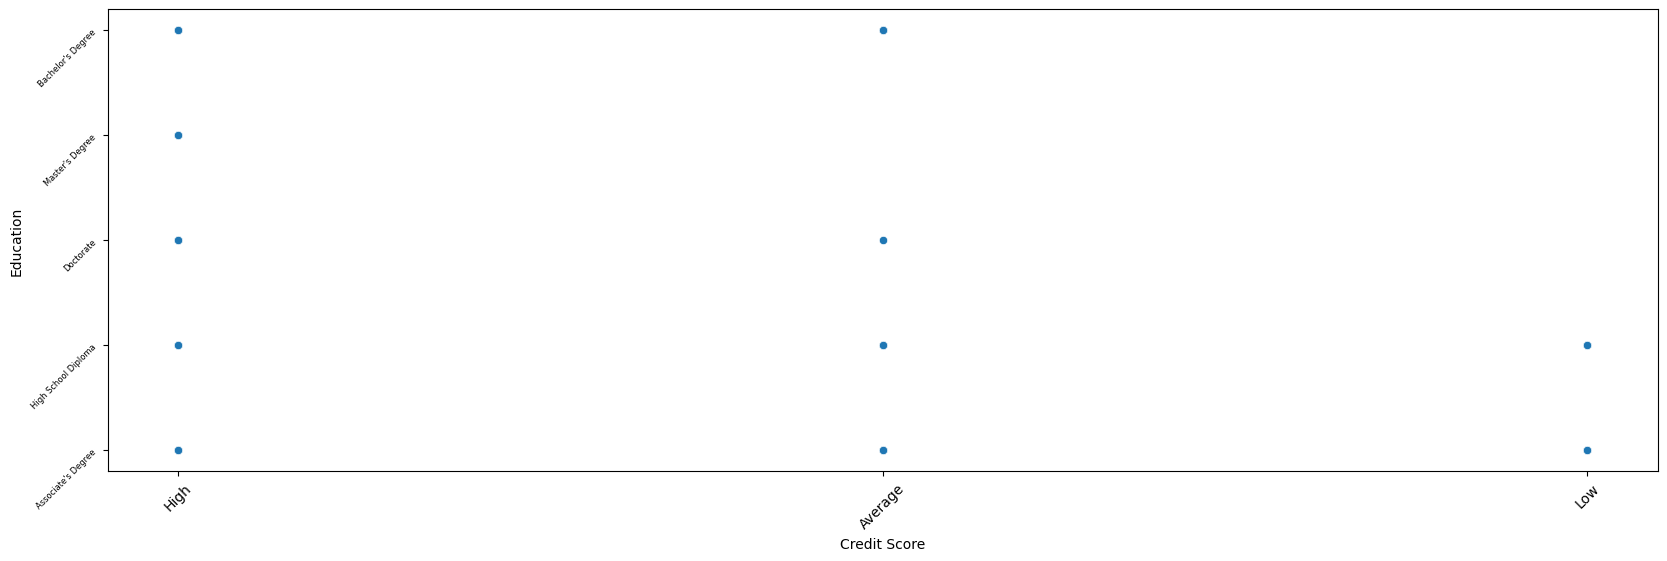

In [ ]:
#Análise bivariada - Qual a relação entre o score de crédito e o nível de escolaridade?
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Credit Score', y='Education', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = Quanto menor o nível de escolaridade, menor o score de crédito

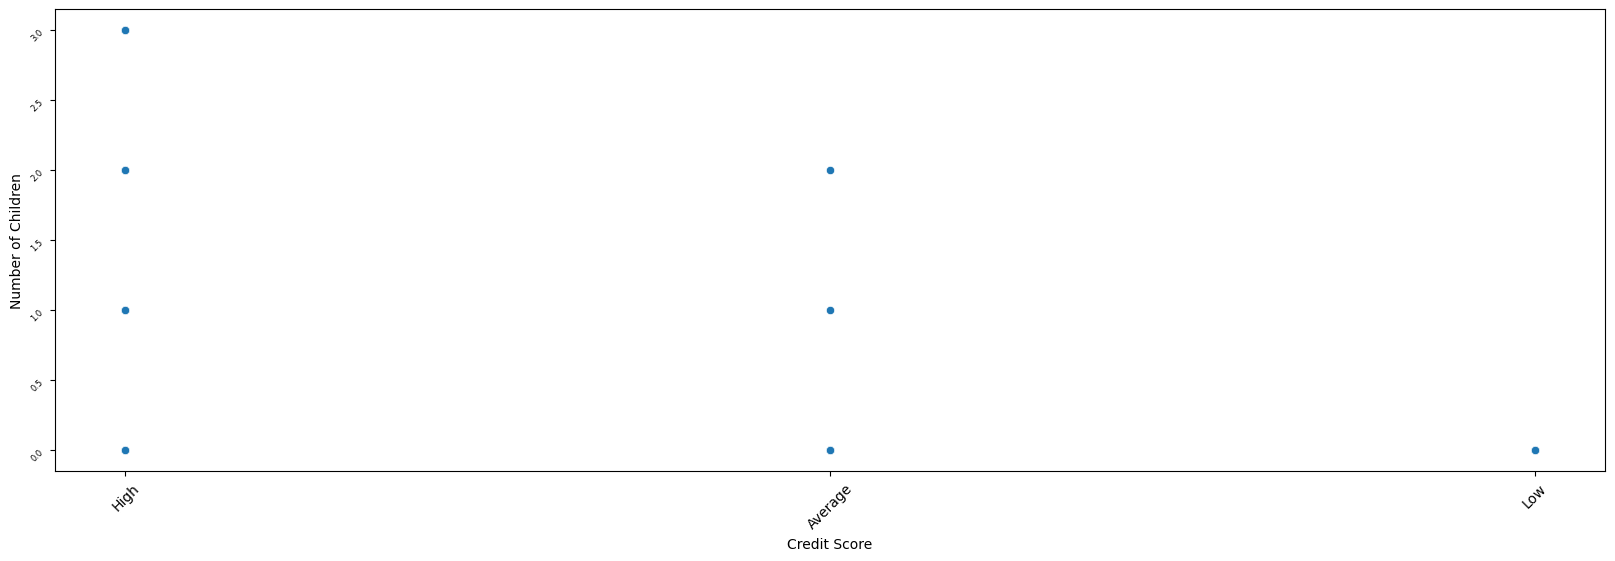

In [ ]:
#Análise bivariada - Qual a relação entre o número de filhos e o Score de crédito?
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Credit Score', y='Number of Children', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = Quanto maior o número de filhos, maior o score de crédito

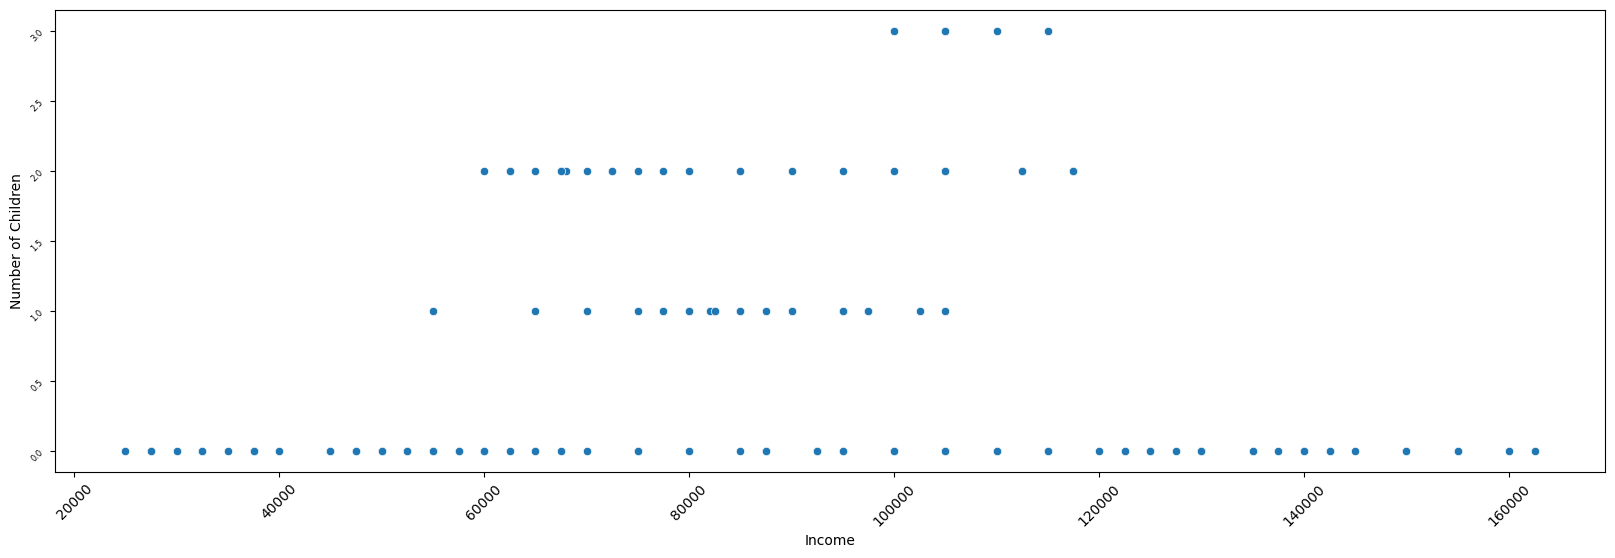

In [ ]:
#Análise bivariada - Qual a relação entre o número de filhos e o salário?
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Income', y='Number of Children', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = Quem possui três filhos (número máximo da pesquisa) está na média salarial. Quem não tem filhos ou está como o salário acima da média ou está abaixo da média.

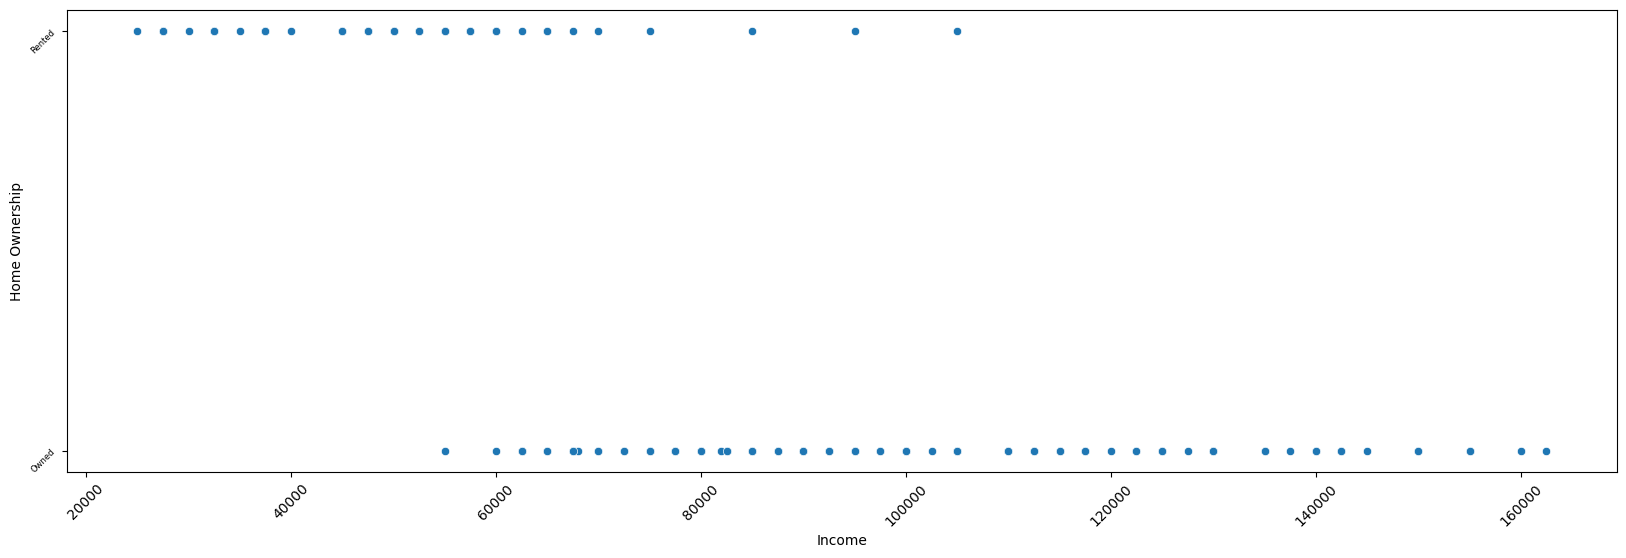

In [ ]:
#Análise bivariada - Qual a relação entre a situação de moradia e o salário?
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Income', y='Home Ownership', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45, fontsize=6)
plt.show()
# Insight = Quanto maior o salário, maiores as chances de possuir casa própria

Matriz de Correlação:


,Age,Income,Number of Children
Age,1.000000,0.621492,0.072432
Income,0.621492,1.000000,0.084547
Number of Children,0.072432,0.084547,1.000000


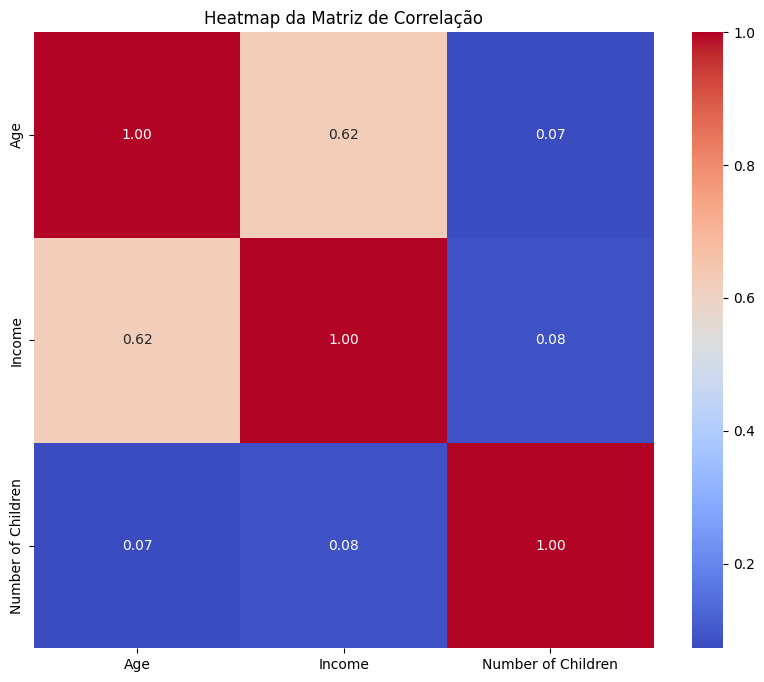

In [ ]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print("Matriz de Correlação:")
display(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Matriz de Correlação')
plt.show()

A correlação mais forte observada é entre Idade e Salário, o que é um achado razoável em muitos conjuntos de dados demográficos. As correlações com "Número de Filhos" são muito fracas, sugerindo que, neste conjunto de dados, idade e renda não são preditores fortes do número de filhos.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_cols = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df_encoded = df.drop(categorical_cols, axis=1)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

display(df_encoded.head())

,Age,Income,Number of Children,Gender_Female,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Home Ownership_Rented,Credit Score_Average,Credit Score_High,Credit Score_Low
0,25,50000.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,30,100000.0,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,35,75000.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40,125000.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,45,100000.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Matriz de Correlação (incluindo variáveis categóricas):


,Age,Income,Number of Children,Gender_Female,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Home Ownership_Rented,Credit Score_Average,Credit Score_High,Credit Score_Low
Age,1.000000,0.621492,0.072432,-0.204661,0.204661,-0.143270,-0.133347,0.187276,-0.010121,0.097338,0.449115,-0.449115,0.628042,-0.628042,-0.490870,0.621676,-0.293446
Income,0.621492,1.000000,0.084547,-0.495738,0.495738,-0.300988,-0.079067,0.060776,-0.061150,0.344382,0.471004,-0.471004,0.704928,-0.704928,-0.463249,0.730332,-0.507582
Number of Children,0.072432,0.084547,1.000000,0.442139,-0.442139,-0.314195,0.310881,0.102117,-0.260999,0.092207,0.696984,-0.696984,0.497129,-0.497129,-0.342718,0.452844,-0.235066
Gender_Female,-0.204661,-0.495738,0.442139,1.000000,-1.000000,-0.105632,0.223104,0.272675,-0.023108,-0.379875,0.278362,-0.278362,-0.031519,0.031519,-0.114394,-0.085886,0.302169
Gender_Male,0.204661,0.495738,-0.442139,-1.000000,1.000000,0.105632,-0.223104,-0.272675,0.023108,0.379875,-0.278362,0.278362,0.031519,-0.031519,0.114394,0.085886,-0.302169
Education_Associate's Degree,-0.143270,-0.300988,-0.314195,-0.105632,0.105632,1.000000,-0.248833,-0.204747,-0.200665,-0.224910,-0.280839,0.280839,-0.432384,0.432384,0.389844,-0.448036,0.159678
Education_Bachelor's Degree,-0.133347,-0.079067,0.310881,0.223104,-0.223104,-0.248833,1.000000,-0.283269,-0.277621,-0.311165,0.132109,-0.132109,-0.072490,0.072490,0.195096,-0.058519,-0.186165
Education_Doctorate,0.187276,0.060776,0.102117,0.272675,-0.272675,-0.204747,-0.283269,1.000000,-0.228435,-0.256036,0.266960,-0.266960,0.300305,-0.300305,-0.218411,0.290696,-0.153182
Education_High School Diploma,-0.010121,-0.061150,-0.260999,-0.023108,0.023108,-0.200665,-0.277621,-0.228435,1.000000,-0.250931,-0.186919,0.186919,-0.178899,0.178899,-0.060409,-0.193217,0.397004
Education_Master's Degree,0.097338,0.344382,0.092207,-0.379875,0.379875,-0.224910,-0.311165,-0.256036,-0.250931,1.000000,0.026638,-0.026638,0.334958,-0.334958,-0.281250,0.356281,-0.168267


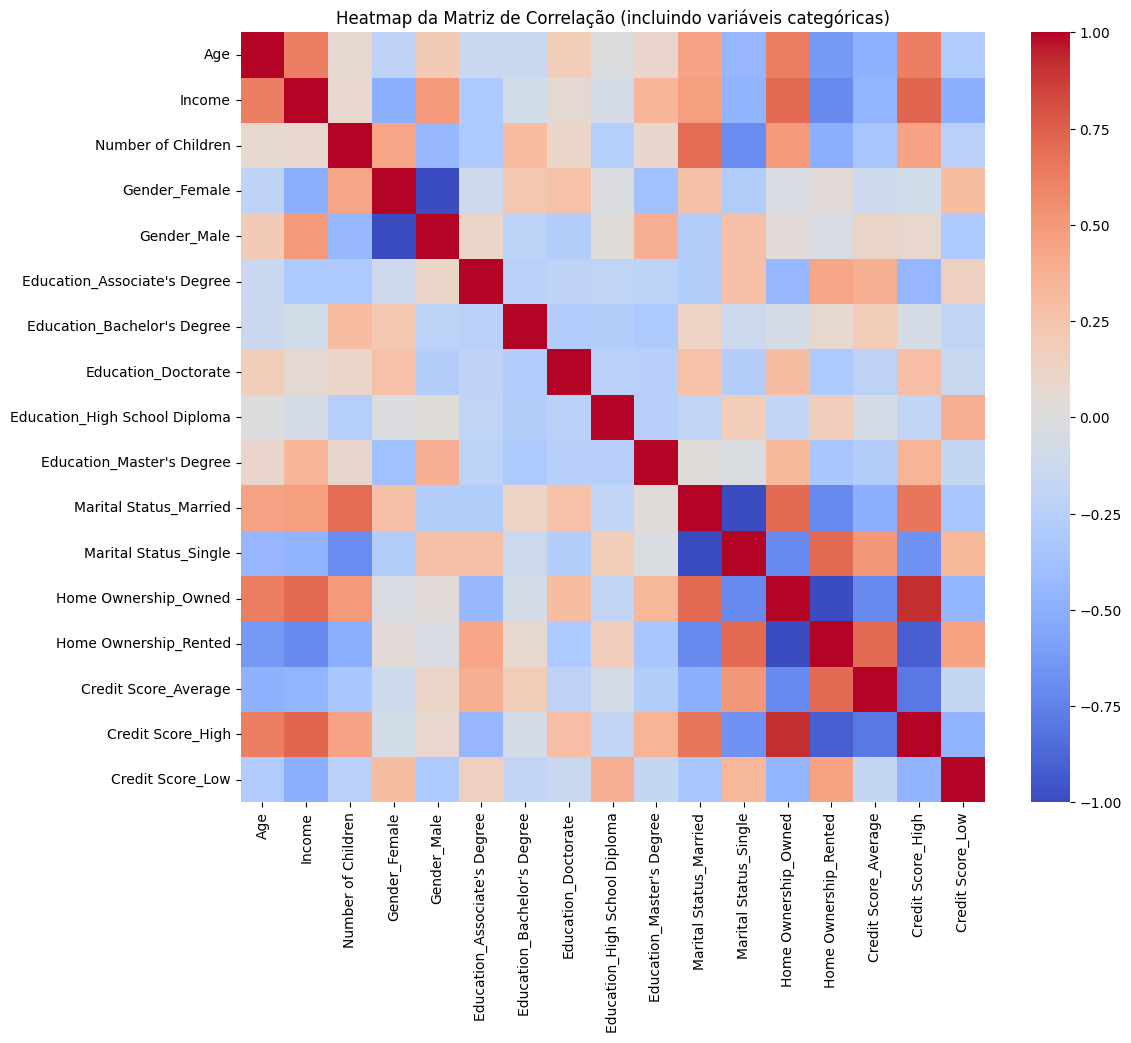

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix_encoded = df_encoded.corr()
print("Matriz de Correlação (incluindo variáveis categóricas):")
display(correlation_matrix_encoded)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Matriz de Correlação (incluindo variáveis categóricas)')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Credit Score_Average', 'Credit Score_High', 'Credit Score_Low'], axis=1)
y = df_encoded[['Credit Score_Average', 'Credit Score_High', 'Credit Score_Low']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

import pandas as pd

X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('Y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('Y_test.csv', index=False)

Shape of X_train: (131, 14)
Shape of X_test: (33, 14)
Shape of y_train: (131, 3)
Shape of y_test: (33, 3)


Contagem de cada categoria em 'Credit Score':


,count
Credit Score,
High,113
Average,36
Low,15


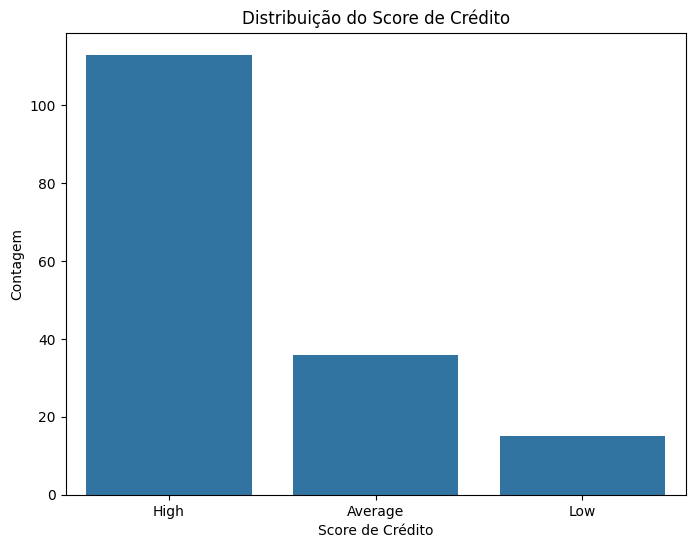


Conclusão sobre o balanceamento da coluna 'Credit Score':
A coluna 'Credit Score' parece estar desbalanceada, com algumas categorias tendo significativamente menos exemplos do que outras.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

credit_score_counts = df['Credit Score'].value_counts()

print("Contagem de cada categoria em 'Credit Score':")
display(credit_score_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=credit_score_counts.index, y=credit_score_counts.values)
plt.title('Distribuição do Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Contagem')
plt.show()

print("\nConclusão sobre o balanceamento da coluna 'Credit Score':")
if credit_score_counts.min() / credit_score_counts.max() > 0.5:
    print("A coluna 'Credit Score' parece estar razoavelmente balanceada.")
else:
    print("A coluna 'Credit Score' parece estar desbalanceada, com algumas categorias tendo significativamente menos exemplos do que outras.")

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=42)
y_train_labels = y_train.apply(lambda x: x.idxmax(), axis=1)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_labels)

print("Shape do X_train depois do SMOTE:", X_train_balanced.shape)
print("Shape do y_train depois do SMOTE:", y_train_balanced.shape)

print("\nDistribuição do 'Credit Score' balanceado:")
display(y_train_balanced.value_counts())

Shape do X_train depois do SMOTE: (270, 14)
Shape do y_train depois do SMOTE: (270,)

Distribuição do 'Credit Score' balanceado:


,count
Credit Score_High,90
Credit Score_Average,90
Credit Score_Low,90
